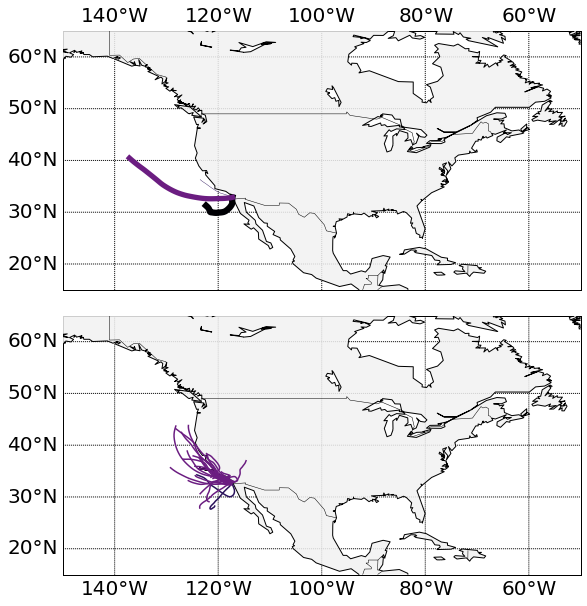

In [1]:

#Disclaimer: This code is adapted from mscross et al. (https://github.com/mscross/pysplit)


"""
===============================
Clustering with PySPLIT
===============================

PySPLIT can facilitate the process of preparing for HYSPLIT's spatial
clustering procedure and displaying and analyzing the results.

Trajectory requirements
------------------------

If your trajectory files have multi-line timepoints, you must have
'clipped trajectories' available.  Trajectory files will be multi-line if
8 or 9 of 9 output meteorological variables are selected at time of generation.
'Clipped' files are identical to the original trajectory files, except
they contain only path information, on which HYSPLIT clustering is based.
For more information on 'clipped trajectories' and how to generate them using
PySPLIT, see the examples ``bulk_trajgen_example.py``
and ``reversetraj_clippedtraj_gen.py``.

Preparing for Clustering
------------------------

We begin by creating a ``TrajectoryGroup`` with the desired trajectories.
In this example, we will use the back trajectories generated in
``bulk_trajgen_example.py``.  For this experiment, we decide in advance to only
use the August trajectories initialized at 1000 m above ground at noon.  

"""
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import pysplit

# We ignored Daylight Saving Time during generation.  EST is UTC-5
trajgroup = pysplit.make_trajectorygroup(r'/Users/ianmarroquin/Desktop/colgate/clippedtraj/*')

"""
Next, we create the list of trajectory files for HYSPLIT to cluster.  The 
required argument, ``infile_dir``, is the directory in which this 'INFILE'
will be saved and in which HYSPLIT will place all new files associated with 
this run.  By default, ``use_clippedpath=True``.  If clipped trajectories are
not found then PySPLIT will output the paths of the original trajectory files.

"""
trajgroup.make_infile(r'/Users/ianmarroquin/Desktop/working/INFILE/')

"""

Clustering
----------
In the HYSPLIT GUI, navigate to the standard clustering run.

Under 'Step 1: Inputs', the user may adjust the clustering parameters (hours, 
interval, skip, projection) and should ensure that the working folder matches
the location of 'INFILE'.  For this run, we will only change the parameter
'Hours to cluster' to 120, which is the total length of our trajectories.

Under 'Step 2: Run Cluster Program', press 'Run cluster analysis', and when it
finishes 'Display total spatial variance' and 'Run' to determine the possible 
final number of clusters.  We will choose 7, which seems to be the least bad.

Under 'Step 3: Get Results', update the 'Number of Clusters' with the chosen
number (7) and assign trajectories to clusters (press 'Run' button).  
This generates a file in the working folder called 'CLUSLIST_7', which
indicates which trajectory belongs to which cluster.  Press
'Display Means' to obtain mean cluster paths.  This generates 7 files in the
working folder called 'C#_7mean.tdump', where # stands for 1 through 7.
The pop-up display window can be quit.


In PySPLIT
----------
PySPLIT contains two additional classes to manage clustering data.  ``Cluster``
is a ``HyPath`` subclass like ``Trajectory`` and a ``HyGroup`` subclass like
``TrajectoryGroup``, as it has both path information and member trajectories.
``ClusterGroup`` is the set of ``Clusters`` generated in a single clustering
procedure.  From our original ``TrajectoryGroup`` the ``ClusterGroup`` and 
member ``Cluster``s are made as shown below.  Most operations that can be done
on a ``TrajectoryGroup`` can also be performed on a ``Cluster``, though
indexing/slicing, adding, and subtracting will return a new ``TrajectoryGroup``
rather than a new ``Cluster``, since the latter are specifically defined by the
clustering procedure.

"""

#Note: it may not be the CLUSLIST_3 file you ultimately use i.e., it could be CLUSLIST_5...
traj_assignment = r'/Users/ianmarroquin/hysplit/cluster/working/CLUSLIST_3'
clusterpath_dir = r'/Users/ianmarroquin/hysplit/cluster/working'
clusgroup = pysplit.spawn_clusters(trajgroup, traj_assignment, clusterpath_dir)


"""
An example mapping procedure is below.  The ``Cluster`` path linewidths
represent the portion of trajectories that are members relative to the total
number of trajectories clustered.
"""

colors = np.linspace(0, 0.95, 7)

mapcorners =  [-150, 15, -50, 65]
standard_pm = None
mapdesign0 = pysplit.MapDesign(mapcorners, standard_pm)
mapdesign1 = pysplit.MapDesign(mapcorners, standard_pm, lon_labels=['bottom'])

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10,10))
map0 = mapdesign0.make_basemap(ax=ax0)
map1 = mapdesign1.make_basemap(ax=ax1)

# Text on maps
x, y = map0(-135, 25)
font_params = {'horizontalalignment' : 'center',
               'verticalalignment' : 'center',
               'fontsize' : 10,
               'weight' : 'bold'}

ax0.text(x, y, 'Clusters', **font_params)
ax1.text(x, y, 'Trajectories', **font_params)

for clus, color in zip(clusgroup, colors):
    params = {'zorder' : 24,
    		  'latlon' : True,
    		  'c' : plt.cm.magma(color)}

    map0.plot(*clus.path.xy, lw=(clus.trajcount/clusgroup.trajcount)*12,
    		  **params)

    for traj in clus:
        map1.plot(*traj.path.xy, lw=1.5, **params)
        
fig.subplots_adjust(hspace=0.1)


In [ ]:

#Note: Clustering appears to use the clipped folder, and so a work around was to add the reverse trajectories into the clipped trajectories folder.
